In [2]:
# PlantCV Color Correction Workflow

In [ ]:
!pip install opencv-python
!pip install plantcv

In [146]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

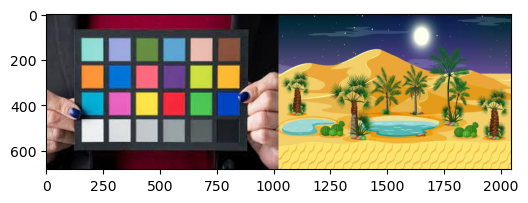

In [186]:
# target: This image will be of the color profile to which other images will be corrected.
target_img, targetpath, targetname = pcv.readimage(filename="target2.png")

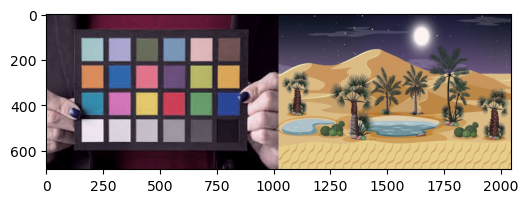

In [187]:
# src: this will be corrected to the target image's color profile.
source_img, sourcepath, sourcename = pcv.readimage(filename="src5.png")

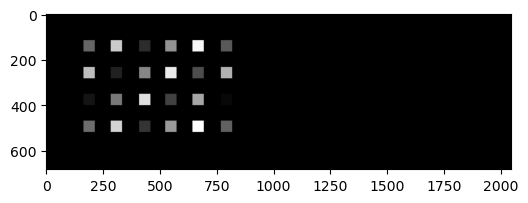

In [188]:
# mask : generated mask to specify the interested region for color callibration //generation script @ll4
mask, maskpath, maskname = pcv.readimage(filename="mask.png")

# for both images same mask used as their positions are identical

In [189]:
#.npz files containing target_matrix, source_matrix, and 
# transformation_matrix will be saved to the output_directory file path

output_directory = "./clib2"

In [190]:
#  Color calib function Inputs:
#   target_img - RGB image with color chips (control enviorenment)
#   target_mask- Grayscale image with color chips and background each represented with unique values 
#   source_img - A RGB image with color chips 
#   source_mask -Grayscale image with color chips and background each represented with unique values 
#   output_directory - File path to which the target_matrix, source_matrix, and tranformation_matrix will be saved

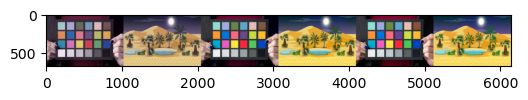

In [191]:
target_matrix, source_matrix, transformation_matrix, corrected_img = pcv.transform.correct_color(target_img=target_img, 
                                                                                                 target_mask=mask, 
                                                                                                 source_img=source_img, 
                                                                                                 source_mask=mask, 
                                                                                                 output_directory=output_directory)

In [192]:
cv2.imwrite("src6.png", corrected_img)

True

In [109]:
###################################################################################################################

In [ ]:
# Helper to create mask

In [114]:
from plantcv import plantcv as pcv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

pcv.params.debug = "plot"

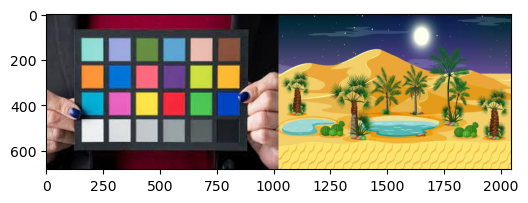

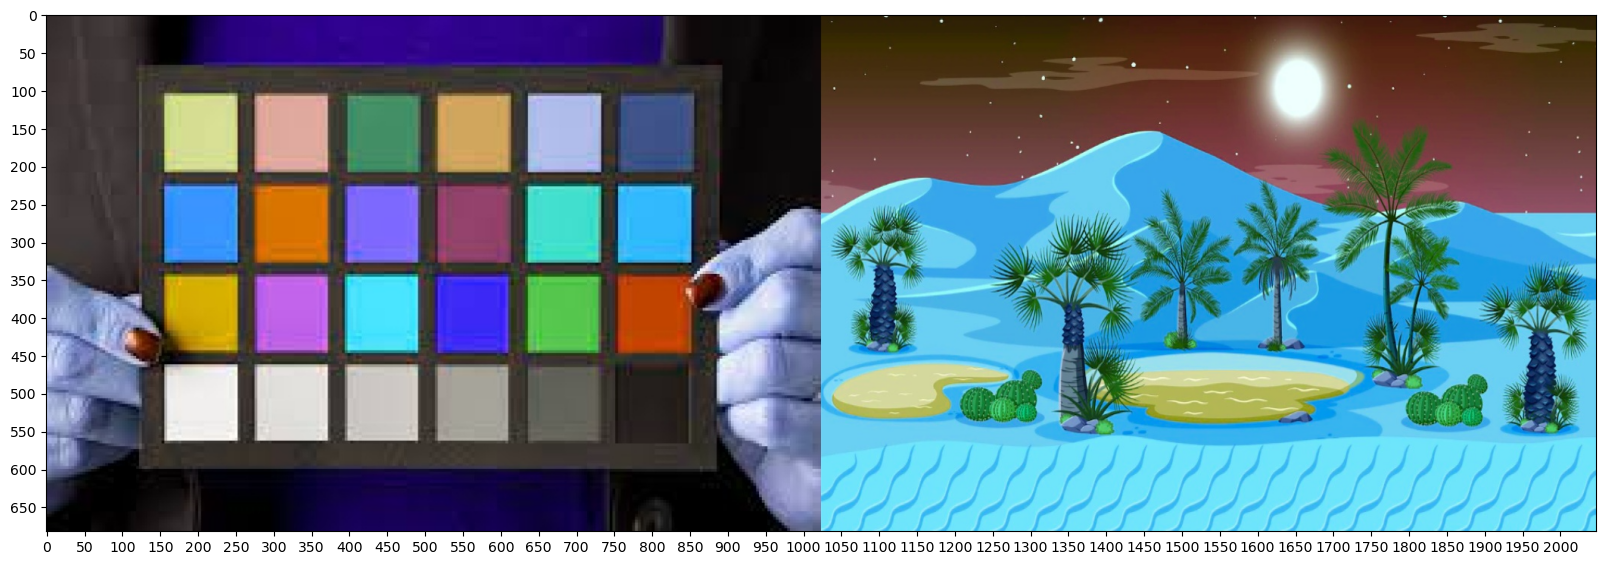

In [171]:
img, imgpath, imgname = pcv.readimage(filename="target2.png") #read in image to create mask
#pcv.plot_image(img)

img_height, img_width, channels = img.shape

# to aid determine interested cordinates
figure(figsize=(20, 20))
plt.xticks(np.arange(0, img_width+1, 50))
plt.yticks(np.arange(0, img_height+1, 50))
plt.imshow(img)

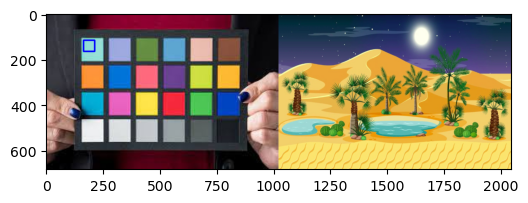

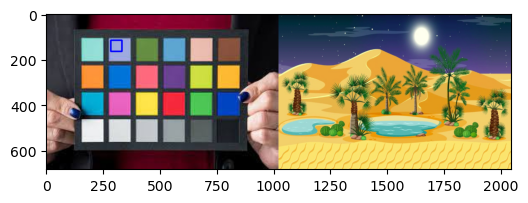

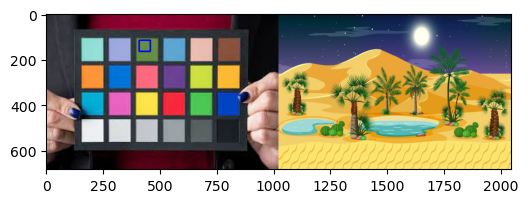

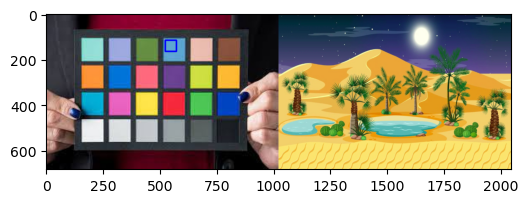

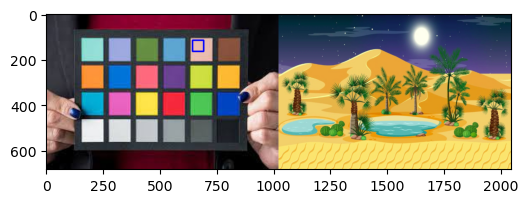

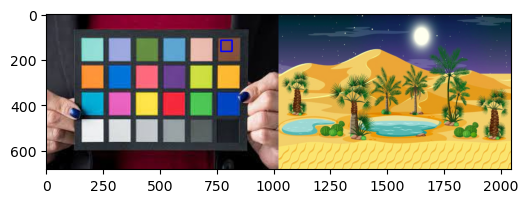

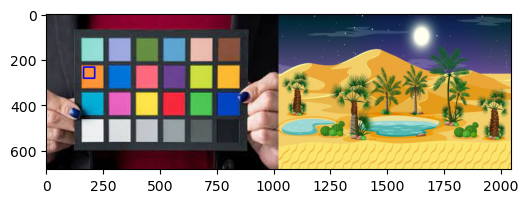

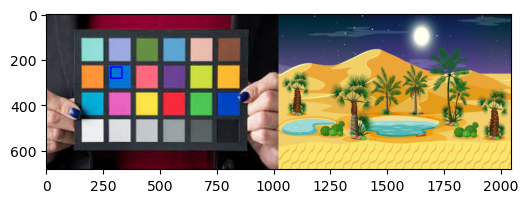

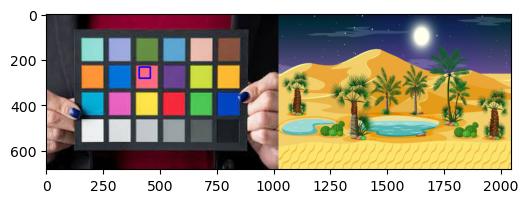

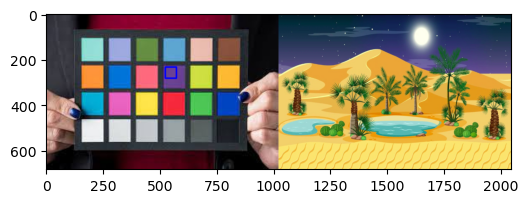

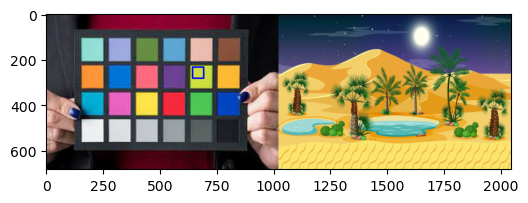

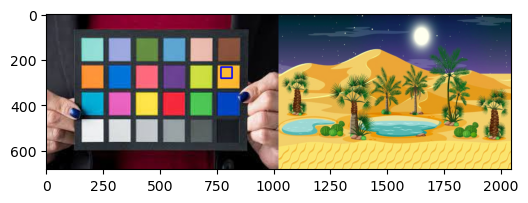

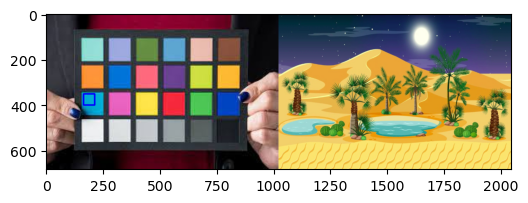

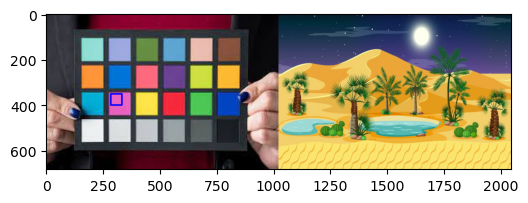

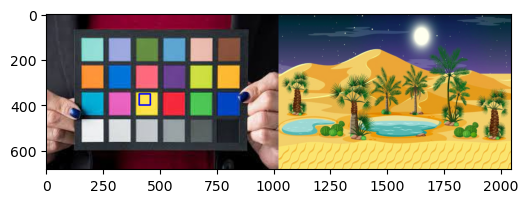

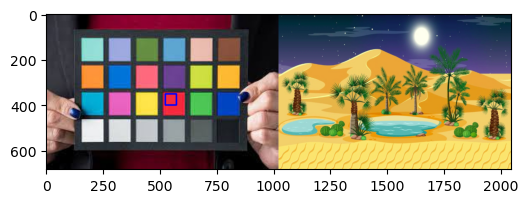

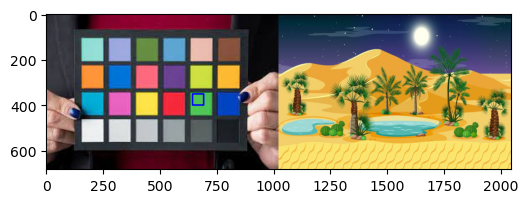

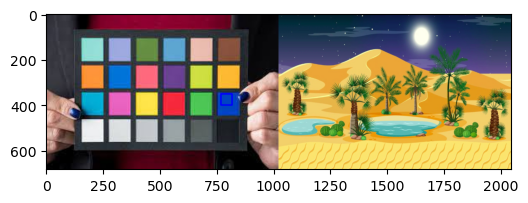

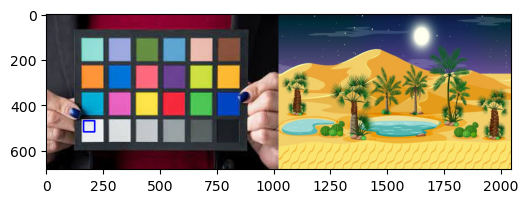

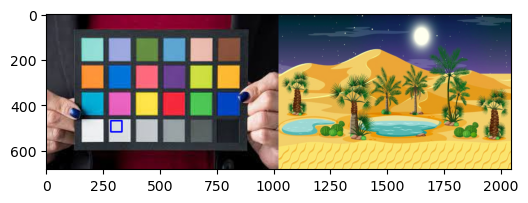

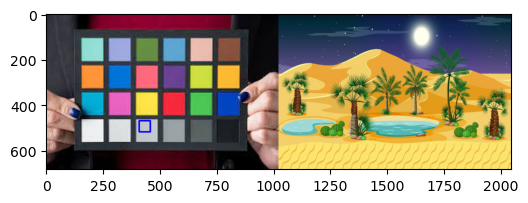

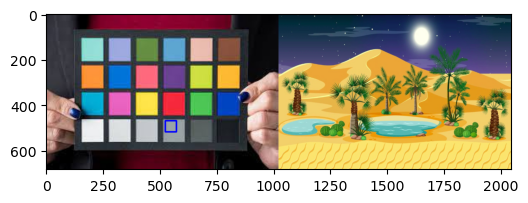

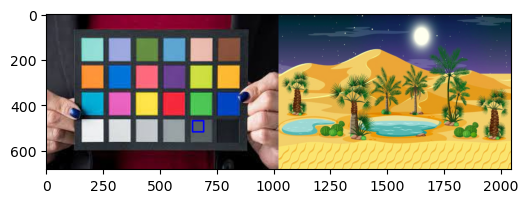

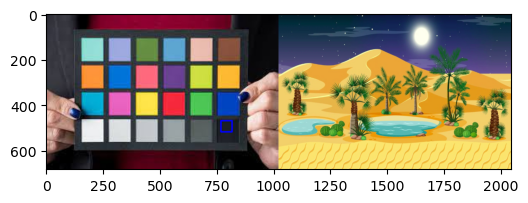

In [172]:
# Using the pixel coordinate on the plotted image, 
# designate a region of interest for an n x n pixel region in each color chip.

dimensions = [50, 50]  #pixel Region of interest (ROI) dimensions

chips = []  # hold regions of interests (color chips)

#Declare first row:

# Inputs: 
#   img - RGB or grayscale image to plot the ROI on 
#   x - The x-coordinate of the upper left corner of the rectangle 
#   y - The y-coordinate of the upper left corner of the rectangle 
#   h - The height of the rectangle 
#   w - The width of the rectangle 

chips.append(pcv.roi.rectangle(img=img, x=165, y=115, w=dimensions[0], h=dimensions[1])) 
chips.append(pcv.roi.rectangle(img=img, x=285 , y=115 , w=dimensions[0], h=dimensions[1]))
chips.append(pcv.roi.rectangle(img=img, x=410 , y=115 , w=dimensions[0], h=dimensions[1]))
chips.append(pcv.roi.rectangle(img=img, x=525 , y=115 , w=dimensions[0], h=dimensions[1]))
chips.append(pcv.roi.rectangle(img=img, x=645 , y=115 , w=dimensions[0], h=dimensions[1]))
chips.append(pcv.roi.rectangle(img=img, x=770 , y=115 , w=dimensions[0], h=dimensions[1]))

#declare y_shift
y_shift = 118

#declare number of total rows
row_total = 4

#declare all other rows
for i in range(1, row_total):
    chips.append(pcv.roi.rectangle(img=img, x=165, y=115 + i * y_shift, w=dimensions[0], h=dimensions[1]))
    chips.append(pcv.roi.rectangle(img=img, x=285 , y=115 + i * y_shift, w=dimensions[0], h=dimensions[1]))
    chips.append(pcv.roi.rectangle(img=img, x=410 , y=115 + i * y_shift, w=dimensions[0], h=dimensions[1]))
    chips.append(pcv.roi.rectangle(img=img, x=525 , y=115 + i * y_shift, w=dimensions[0], h=dimensions[1]))
    chips.append(pcv.roi.rectangle(img=img, x=645 , y=115 + i * y_shift, w=dimensions[0], h=dimensions[1]))
    chips.append(pcv.roi.rectangle(img=img, x=770 , y=115 + i * y_shift, w=dimensions[0], h=dimensions[1]))


In [173]:
# create empty mask img.

mask = np.zeros(shape=np.shape(img)[:2], dtype = np.uint8())
print(mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [174]:
# draw contours for each region of interest and give them unique color values.

i = 1
for chip in chips:
    #print(chip)
    mask = cv2.drawContours(mask, chip[0], -1, (i*10), -1)
    i += 1


pcv.plot_image(mask, cmap="gray")

mask = mask * 10  #multiply values in the mask for greater contrast. Exclude if designating have more than 25 color chips.

In [175]:
np.unique(mask)
pcv.print_image(img=mask, filename="mask.png") #write to file.

In [ ]:
###################################################################################################################

In [ ]:
# helpers for concatenating images with colorcard

In [170]:
# resize colorCard image and concatenate // so that all images have colorcard

imgMain = cv2.imread('target.png')           # all images
imgColorCard = cv2.imread('decert.png')   # image with colorCard

imgMain_height, imgMain_width, channels = imgMain.shape

width = imgMain_width
height = imgMain_height
dim = (width, height)

# resize colorCard image to match other images
resized = cv2.resize(imgColorCard, dim, interpolation = cv2.INTER_AREA)

cv2.imwrite('resized.jpg', resized)

# concatenate both images
vis = np.concatenate((imgMain, resized), axis=1) # result = padded resized img
cv2.imwrite('Resized_and_Concatenated.jpg', vis) # write concatenated image

True

In [3]:
# padded colorCard image concatenated (Another option to resize image)

# read image
imgColorCard = cv2.imread('colorCard.jpeg')
imgColorCard_height, imgColorCard_width, channels = imgColorCard.shape

# create new image of desired size and color (blue) for padding
#new_image_width = 1280
#new_image_height = 920
color = (0,0,0)

result = np.full((imgMain_height,imgMain_width, channels), color, dtype=np.uint8)

# compute center offset
x_center = (imgMain_width - imgColorCard_width) // 2
y_center = (imgMain_height - imgColorCard_height) // 2

# copy img image into center of result image
result[y_center:y_center+imgColorCard_height, 
       x_center:x_center+imgColorCard_width] = imgColorCard

# save result
cv2.imwrite("colorCard_resized_padded.jpg", result)

# concatenate both images
vis = np.concatenate((imgMain, result), axis=1) # result = padded resized img
cv2.imwrite('concatenated.jpg', vis)

True